In [16]:
# clone it in the first time.
# !git clone -b functions_L2 https://github.com/kiranvad/geomstats.git

Follow the process in your terminal:

``cd geomstats``     
``pip3 install .``

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler

import geomstats.backend as gs
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA
from geomstats.geometry.functions import HilbertSphere

In [18]:
data = pd.read_csv('simulated_data.csv')
data = data.iloc[:,1:101]

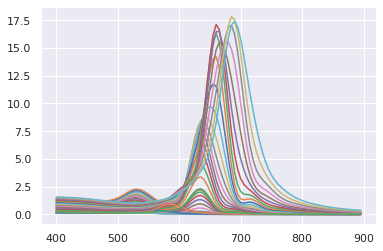

In [19]:
for i in range(len(data)):
    plt.plot(np.arange(400, 900, 5), data.iloc[i,:])
plt.show()

In [20]:
im = np.array(data)

manifold = HilbertSphere(np.arange(400, 900, 5))
sinf_data = gs.array([manifold.projection(si) for si in im]).squeeze()
print('Projection data shape : ', sinf_data.shape)

Projection data shape :  (53, 100)


In [21]:
len(im)

53

INFO: n_iter: 32, final variance: 0.430598496972086, final dist: [0.03675492], final_step_size: 1e-06


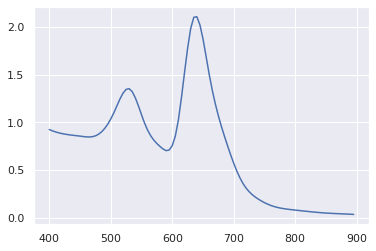

In [22]:
# compute the mean value
mean = FrechetMean(metric=manifold.metric, 
                   method="adaptive", 
                   max_iter=32, 
                   verbose=True)
mean.fit(sinf_data)
mean_estimate = mean.estimate_
fig, ax = plt.subplots()
ax.plot(np.arange(400, 900, 5), mean_estimate.flatten())
plt.show()

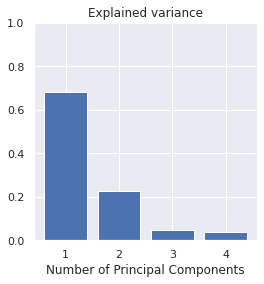

In [23]:
N_COMPONENTS = 4
tpca = TangentPCA(metric=manifold.metric, n_components=N_COMPONENTS)
tpca.fit(sinf_data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(sinf_data)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
xticks = gs.arange(1, tpca.components_.shape[0] + 1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title("Explained variance")
ax.set_xlabel("Number of Principal Components")
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)
plt.show()

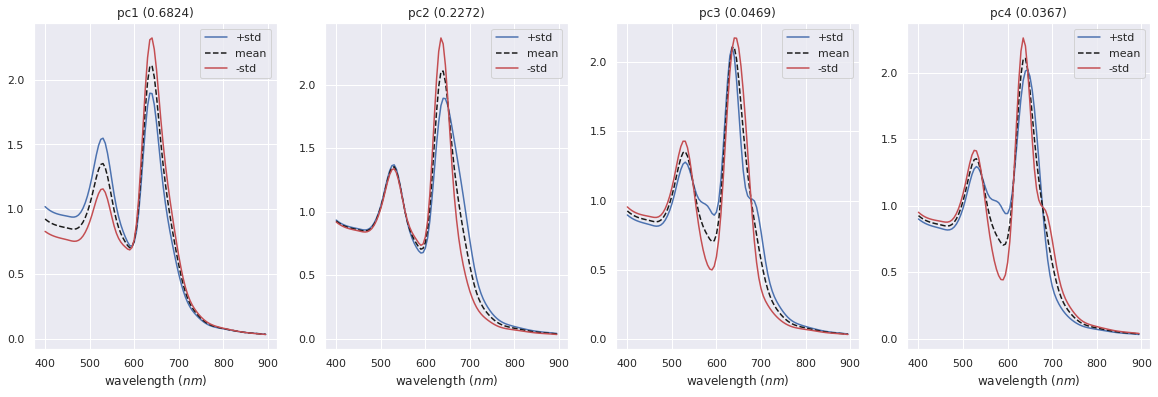

In [24]:
sns.set_theme()
fig,ax=plt.subplots(1,4,figsize=(20,6))
col=['r','k','b']
for i in range(4):
    ax[i].plot(np.arange(400, 900, 5), mean_estimate.flatten()+tpca.components_[i,:], label='+std', c=col[2])
    ax[i].plot(np.arange(400, 900, 5), mean_estimate.flatten(), label='mean', c=col[1], ls='--')
    ax[i].plot(np.arange(400, 900, 5), mean_estimate.flatten()-tpca.components_[i,:], label='-std', c=col[0])
    ax[i].set_title(f'pc{i+1} ({tpca.explained_variance_ratio_[i].round(4)})')
    ax[i].set_xlabel('wavelength $(nm)$',fontsize='12');
    ax[i].legend()